<h2>Data Scientist Application V2.0</h2>

<l1>Problem statement:</l1>
<ul>
<l2>We need to build a machine learning model for our client InternBuddy  which will help to predict and shortlist the right
potential candidate for various roles while applying.
</l2>
</ul>

<l1>Factors that will help to find the potential candidates:</l1>
<ul>
<li>Age</li>
<li>Experience</li>
<li>Potential</li>
<li>Hard Skills</li>
<li>Education</li>
<li>Soft Skills</li>
<li>Cultural Fit</li>
</ul>

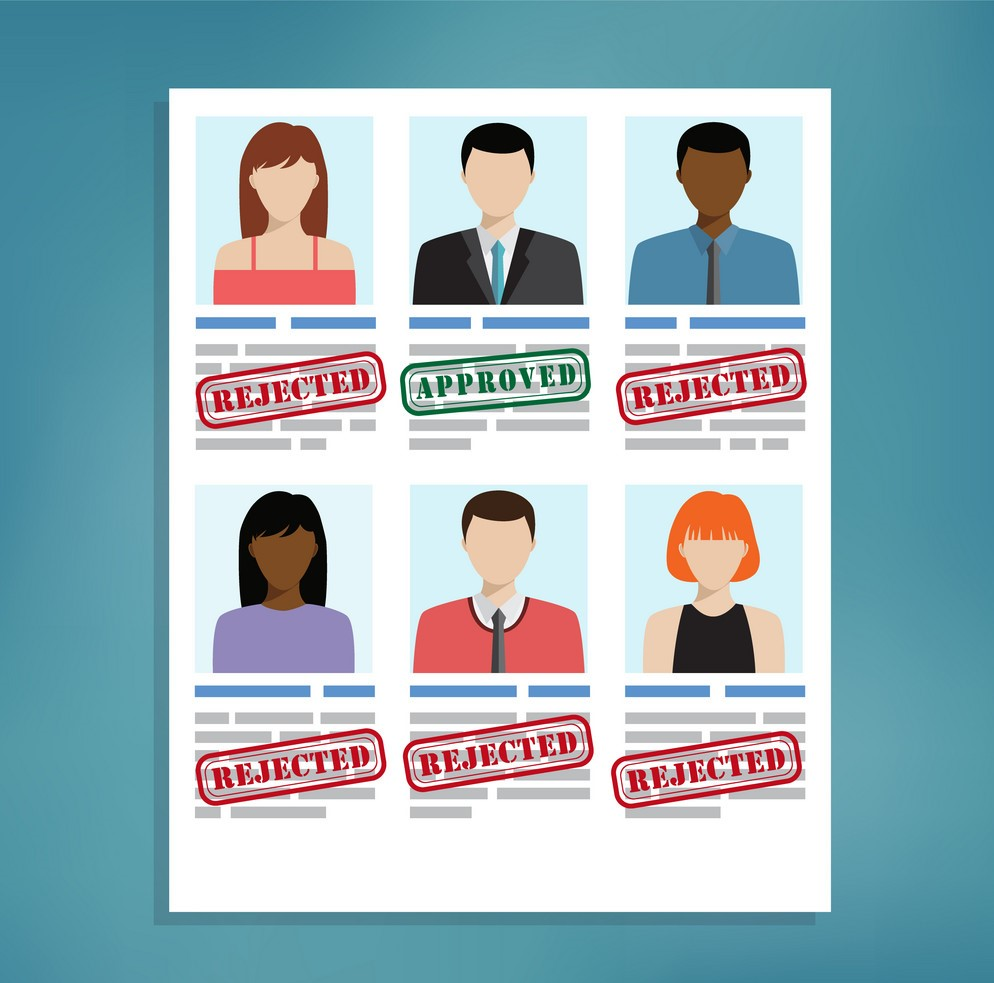

In [1]:
from IPython.display import Image
Image(filename=r"C:\Users\Jitu\Desktop\img\candidate selection.jpg",width=700,height=300)

<h2>Importing Necessary Libraries</h2>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Reading the excel file in Python</h2>

In [3]:
base_data= pd.read_excel(r"C:\Users\Jitu\Desktop\Data_Science_2020_v2.xlsx")

In [4]:
base_data

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Data Science (out of 3),Other skills,Institute,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,DS0001,Bangalore,1,0,3,"Machine Learning, Arduino, C Programming, CSS,...",Global Academy of Technology,Bachelor of Engineering (B.E),Electrical and Electronics Engineering,2019,NaN,7.73/10,NaN,NaN
1,DS0002,Mumbai,2,1,2,"AutoCAD, MS-Office, Machine Learning, Microsof...","Aegis School Of Business, Data Science, Cyber ...",NaN,PGP,2020,NaN,68.00/100,NaN,NaN
2,DS0003,Mumbai,2,0,0,"C++ Programming, Data Structures, Image Proces...","VJTI, Mumbai",Bachelor of Technology (B.Tech),Information Systems,2018,NaN,8.85/10,91.40/91.40,9.40/9.40
3,DS0004,Dhanbad,2,0,2,"Algorithms, C++ Programming, Data Structures, ...",IIT (ISM) Dhanbad,Integrated M.Tech,Mathematics and Computing,2021,NaN,8.40/10,91.80/91.80,10.00/10.00
4,DS0005,Bangalore,2,0,0,"MS-Word, Python, SQL, MS-Excel",Vvce,Bachelor of Engineering (B.E),Electronics and Communication,2018,NaN,NaN,NaN,NaN
5,DS0006,Kharagpur,2,2,0,"C Programming, C++ Programming, CSS, GitHub, H...",Indian Institute Of Technology Kharagpur,Bachelor of Technology (B.Tech),Manufacturing,2021,NaN,6.25/10,NaN,NaN
6,DS0007,Pune,0,0,1,"C++ Programming, Deep Learning, Machine Learning",IIIT Pune,B.Tech (Hons.),Electronics and Communication,2021,NaN,8.70/10,88.00/88.00,9.20/9.20
7,DS0008,Bangalore,2,2,0,"Natural Language Processing (NLP), Python, R P...","Government Engineering College, Bhuj",B.Tech (Hons.),Mining,2016,NaN,7.08/100,NaN,NaN
8,DS0009,Vellore,2,0,1,"Computer Vision, Image Processing, MySQL, Open...",VIT University,Bachelor of Technology (B.Tech),Computer Science & Engineering,2022,NaN,9.30/10,NaN,NaN
9,DS0010,Bangalore,0,0,0,"CSS, HTML, JavaScript, PostgreSQL","MS Ramaiah College Of Arts, Science And Commer...",Master of Business Administration_(MBA),Marketing,2019,NaN,69.00/100,71.10/71.10,86.50/86.50


In [5]:
base_data.shape

(611, 14)

In [6]:
categorical_features = (base_data.select_dtypes(include=['object']).columns.values)
categorical_features

array(['Application_ID', 'Current City', 'Other skills', 'Institute',
       'Degree', 'Stream', 'Performance_PG', 'Performance_UG',
       'Performance_12', 'Performance_10'], dtype=object)

In [7]:
numerical_features = base_data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['Python (out of 3)', 'R Programming (out of 3)',
       'Data Science (out of 3)', 'Current Year Of Graduation'],
      dtype=object)

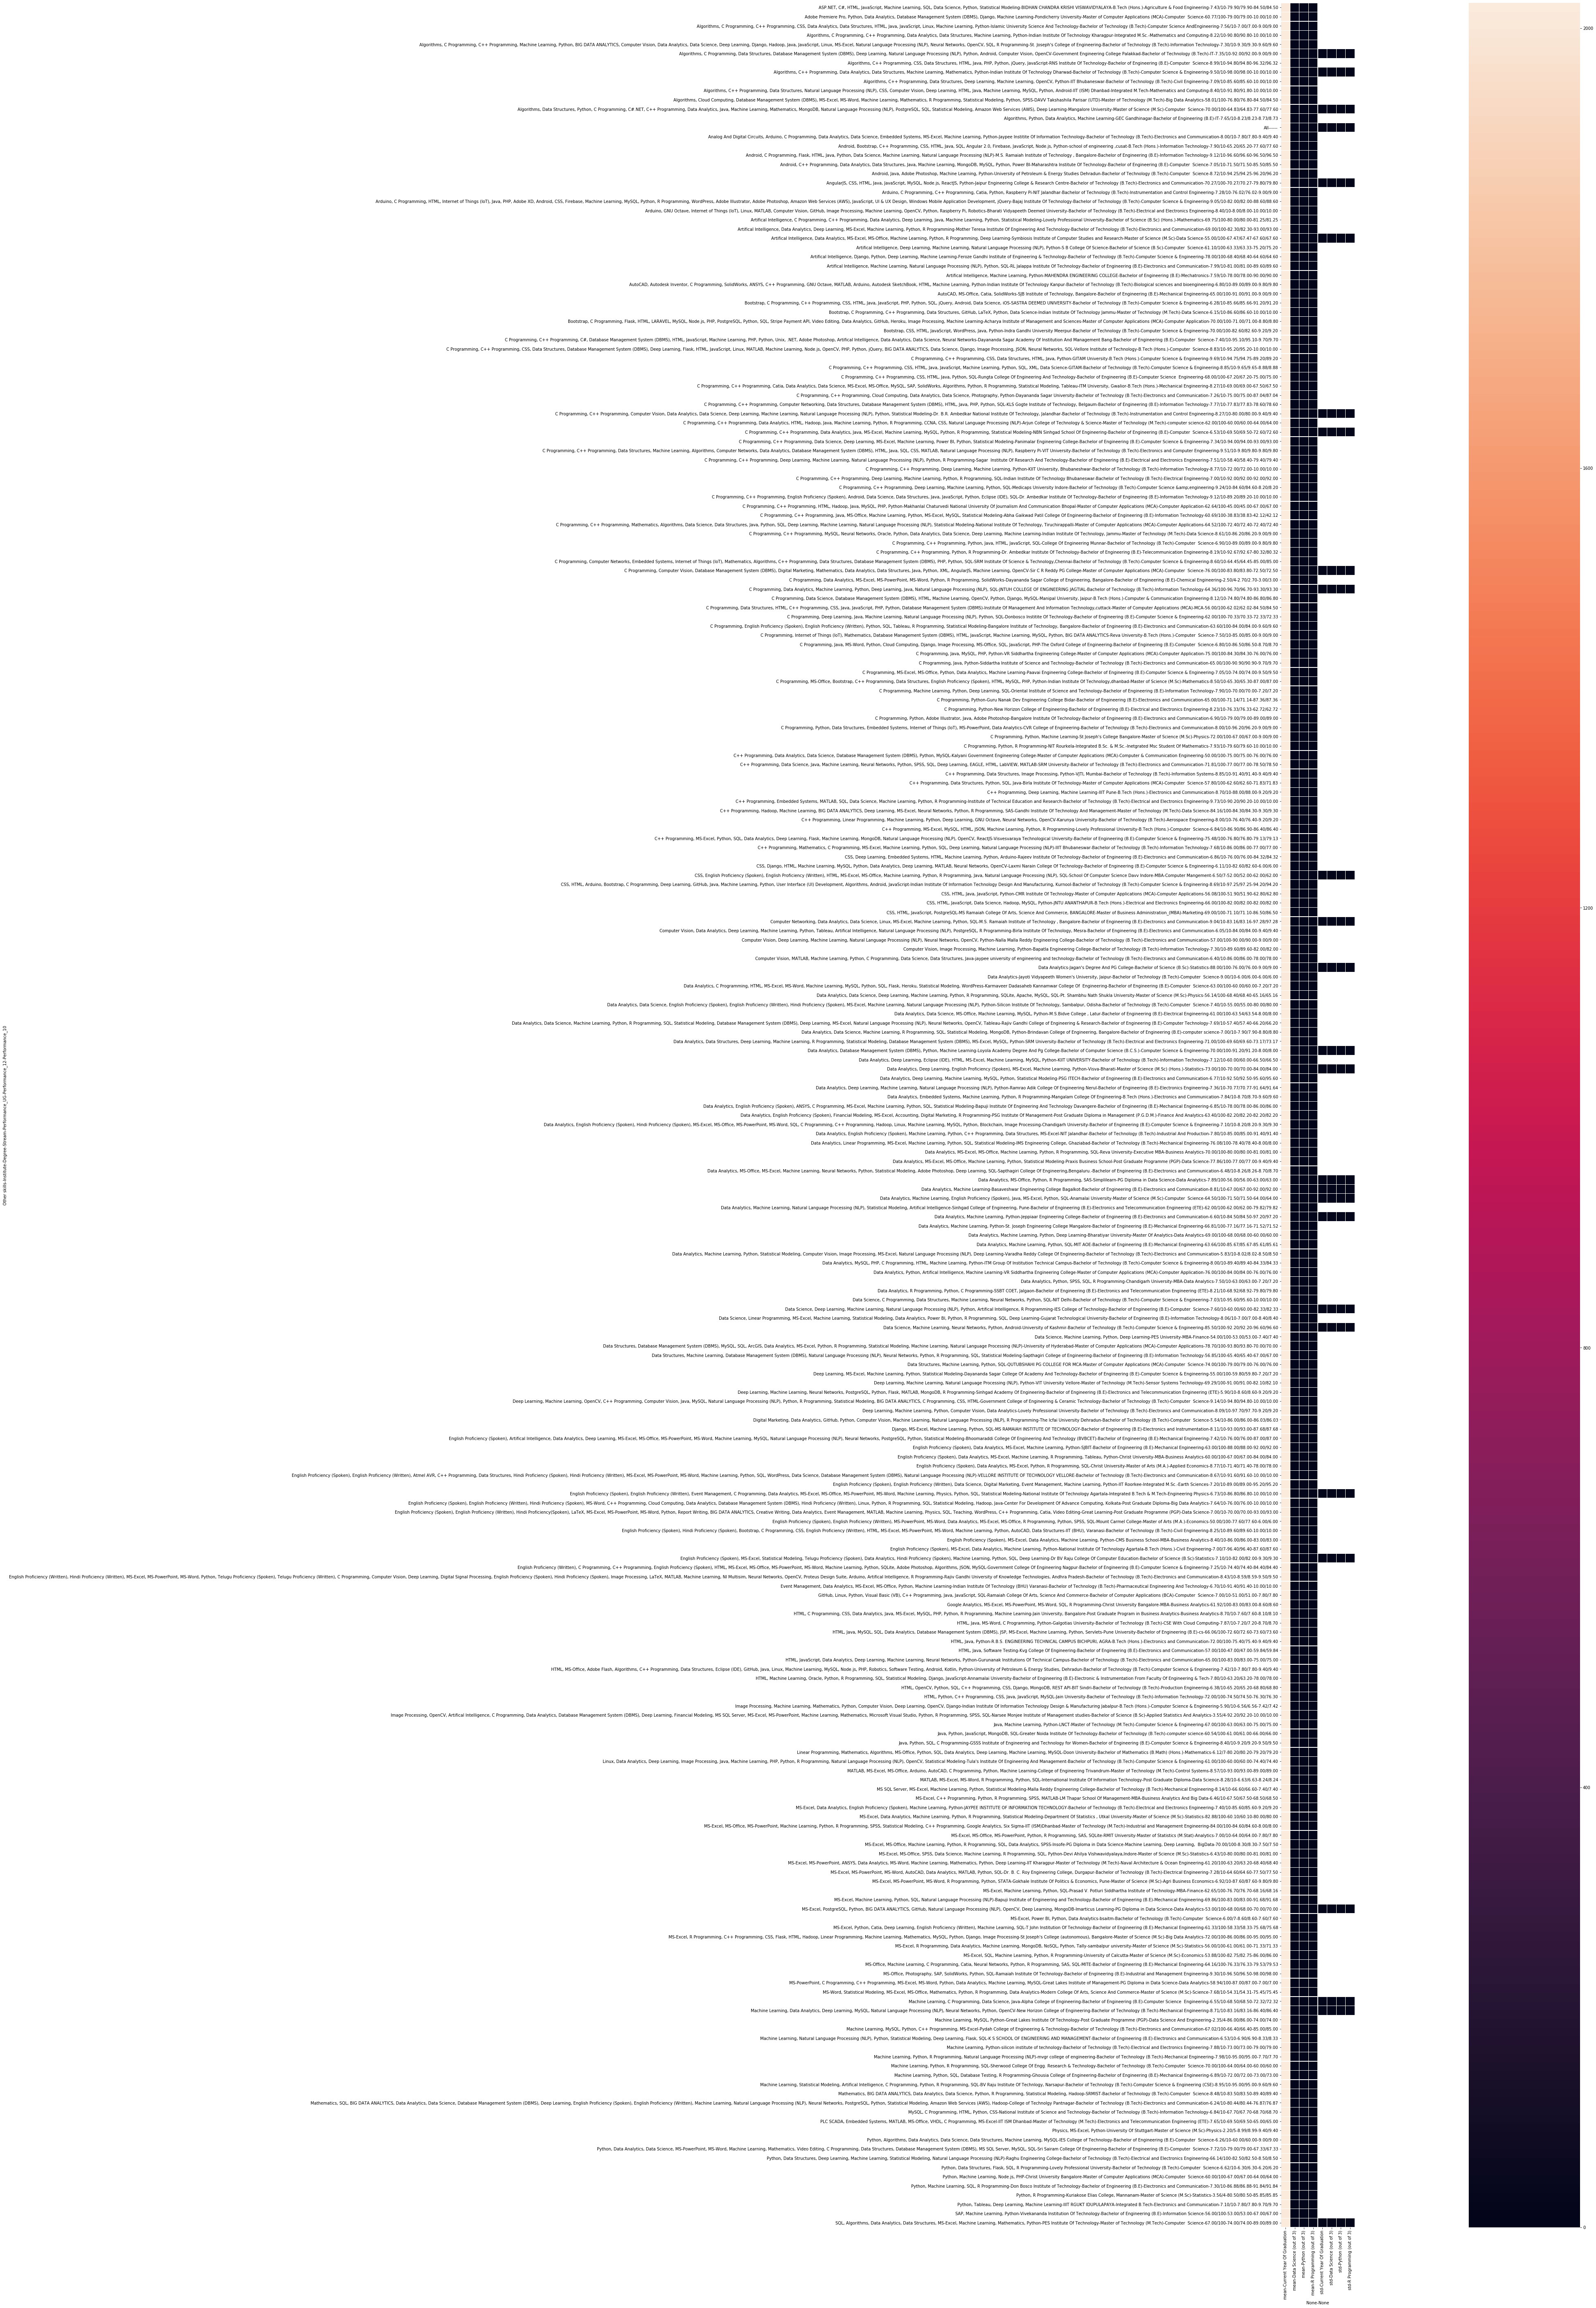

In [8]:
pivot = pd.pivot_table(base_data,
            values = ['Python (out of 3)', 'R Programming (out of 3)',
       'Data Science (out of 3)', 'Current Year Of Graduation'],
            index = ['Other skills','Institute',
       'Degree', 'Stream', 'Performance_UG',
       'Performance_12', 'Performance_10'], 
                       aggfunc=[np.mean, np.std], 
                       margins=True)
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (100,100))
sns.heatmap(pivot,linewidths=0.2,square=True )

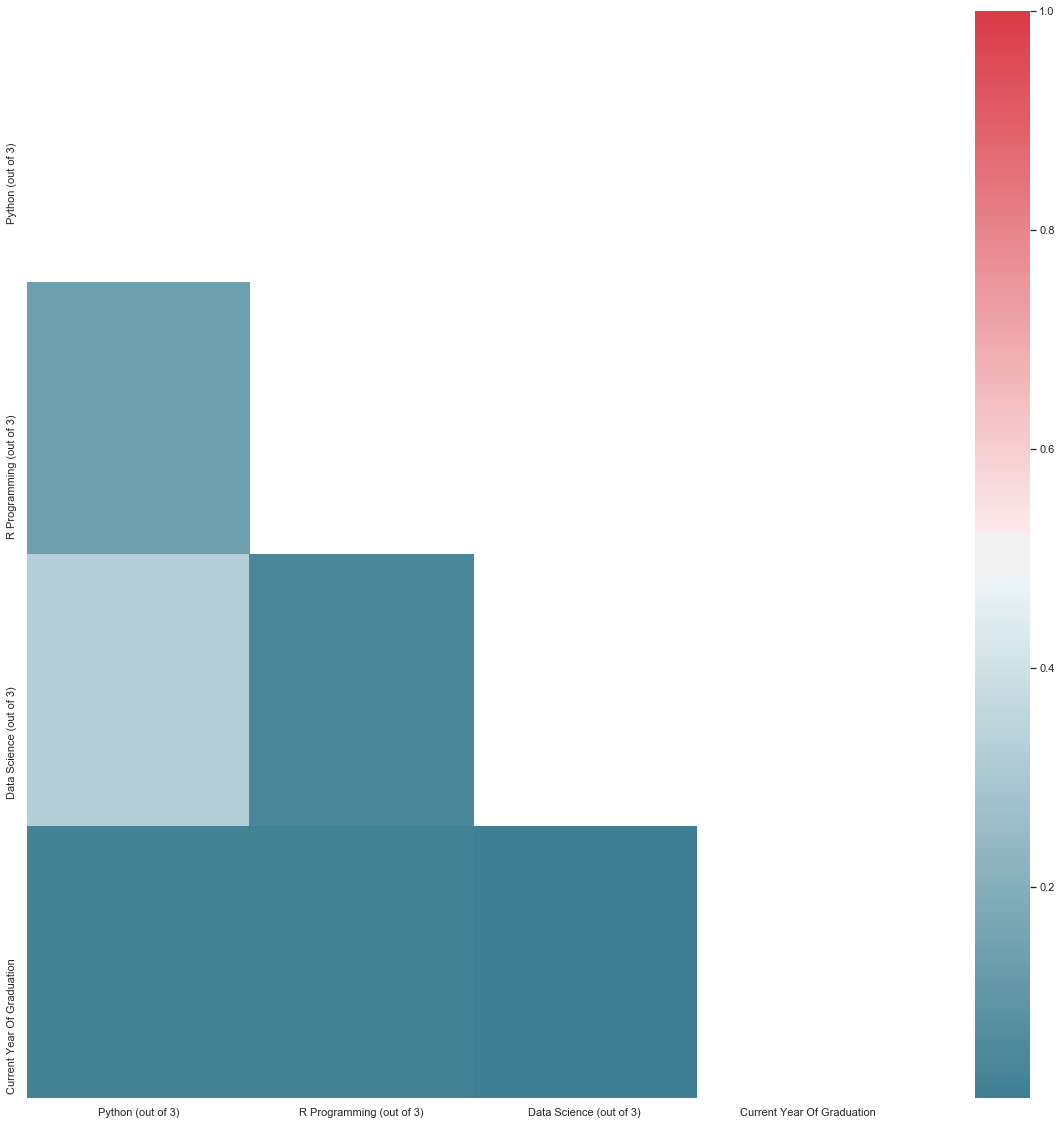

In [9]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = base_data.corr()
#variable_correlations
heat_map(variable_correlations)

In [10]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 14 columns):
Application_ID                611 non-null object
Current City                  611 non-null object
Python (out of 3)             611 non-null int64
R Programming (out of 3)      611 non-null int64
Data Science (out of 3)       611 non-null int64
Other skills                  601 non-null object
Institute                     611 non-null object
Degree                        575 non-null object
Stream                        580 non-null object
Current Year Of Graduation    611 non-null int64
Performance_PG                128 non-null object
Performance_UG                533 non-null object
Performance_12                363 non-null object
Performance_10                339 non-null object
dtypes: int64(4), object(10)
memory usage: 66.9+ KB


In [11]:
base_data.drop(["Performance_PG"],axis=1, inplace = True) 



</l1>I have dropped the above column as it contains more than 30% of null values which can cause bias of the current data
so i considered of dropping that column but to reduce the information loss we can consider that column.</l1>

<h1>Data PreProcessing</h1>

<h2>Null value Treatment</h2>

In [12]:
null_value_table=(base_data.isna().sum()/base_data.shape[0])*100

retained_columns=null_value_table[null_value_table<30].index
drop_columns=null_value_table[null_value_table>30].index

base_data.drop(drop_columns,axis=1,inplace=True)

len(base_data.isna().sum().index)

cont=base_data.describe().columns

cat=[i for i in base_data.columns if i not in base_data.describe().columns]

for i in cat:
    base_data[i].fillna(base_data[i].value_counts().index[0],inplace=True)

for i in cont:
    base_data[i].fillna(base_data[i].median(),inplace=True)

In [13]:
base_data.isna().sum()

Application_ID                0
Current City                  0
Python (out of 3)             0
R Programming (out of 3)      0
Data Science (out of 3)       0
Other skills                  0
Institute                     0
Degree                        0
Stream                        0
Current Year Of Graduation    0
Performance_UG                0
dtype: int64

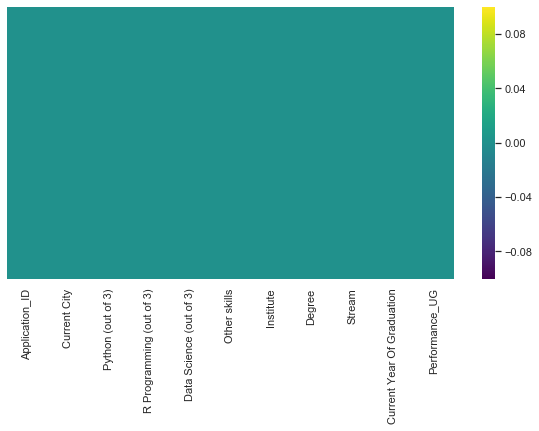

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(base_data.isna(),cmap = 'viridis',yticklabels=False)

<h2>Outlier Treatment</h2>

In [15]:
base_data.var().sort_values(ascending=False).index[1:10]

Index(['Data Science (out of 3)', 'R Programming (out of 3)',
       'Python (out of 3)'],
      dtype='object')

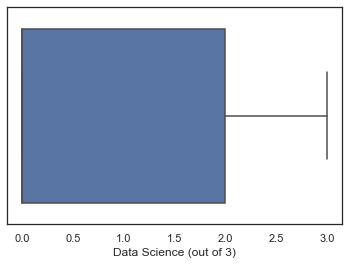

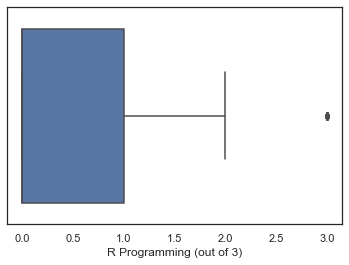

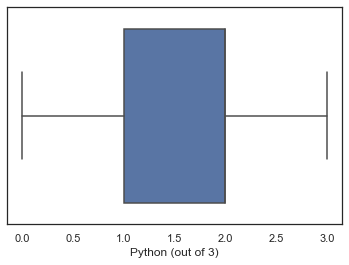

In [16]:
for i in base_data.var().sort_values(ascending=False).index[1:10]:
    sns.boxplot(base_data[i])
    plt.show()

In [17]:
for i in base_data.var().sort_values(ascending=False).index[1:10]:
    x=np.array(base_data[i])
    qr1=np.quantile(x,0.25)
    qr3=np.quantile(x,0.75)
    iqr=qr3-qr1
    utv=qr3+(1.5*(iqr))
    ltv=qr1-(1.5*(iqr))
    y=[]
    for p in x:
        if p <ltv or p>utv:
            y.append(np.median(x))
        else:
            y.append(p)
    base_data[i]=y

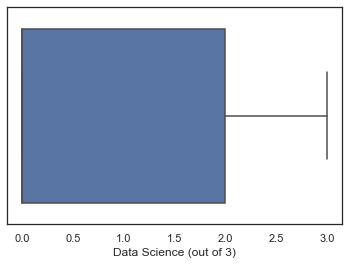

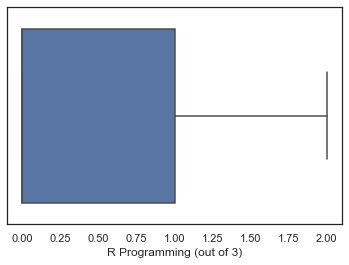

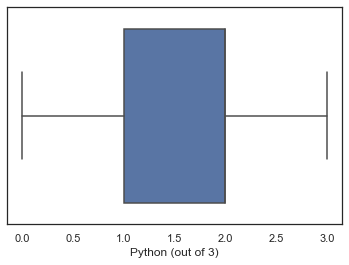

In [18]:
for i in base_data.var().sort_values(ascending=False).index[1:10]:
    sns.boxplot(base_data[i])
    plt.show()

<h2>Label Encoder</h2>

In [19]:
from sklearn.preprocessing import LabelEncoder
for i in cat:
    le=LabelEncoder()
    le.fit(base_data[i])
    x=le.transform(base_data[i])
    base_data[i]=x

In [20]:
len(base_data.columns)

11

In [21]:
len(base_data.mean().index)

11

<h1>Model Building</h1>

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(base_data, base_data, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((488, 11), (123, 11))

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

radm = RandomForestClassifier()
radm.fit(X_train, Y_train)

clf = radm
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(base_data.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 ,  indices[f], base_data.columns[indices[f]], radm.feature_importances_[indices[f]]))


Feature ranking:
1. feature 7 Degree (0.107509)
2. feature 9 Current Year Of Graduation (0.103101)
3. feature 10 Performance_UG (0.102879)
4. feature 5 Other skills (0.102188)
5. feature 6 Institute (0.097855)
6. feature 8 Stream (0.094281)
7. feature 0 Application_ID (0.091047)
8. feature 4 Data Science (out of 3) (0.080690)
9. feature 1 Current City (0.080220)
10. feature 2 Python (out of 3) (0.078364)
11. feature 3 R Programming (out of 3) (0.061865)


In [25]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [('RandomForestClassifierG', RandomForestClassifier()),
               ('RandomForestClassifierE', RandomForestClassifier()),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier()),
               ('KNeighborsClassifier', KNeighborsClassifier()),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('ExtraTreeClassifier', ExtraTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())]
allscores = []
x, Y = base_data.drop('Degree', axis=1), np.asarray(base_data['Degree'], dtype="|S6")

for name, classifier in classifiers:
    scores = []
    for i in range(20): # 20 runs
        roc = cross_val_score(classifier, x,Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.3549597878756831
RandomForestClassifierE 0.3540961524867899
AdaBoostClassifier 0.32255877141357175
ExtraTreesClassifier 0.38159830287838753
KNeighborsClassifier 0.19812385779061265
DecisionTreeClassifier 0.3091251420688078
ExtraTreeClassifier 0.2359299579929043
LogisticRegression 0.24671397131063885
GaussianNB 0.22674245258217746
BernoulliNB 0.330213577767135


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 1080x720 with 0 Axes>

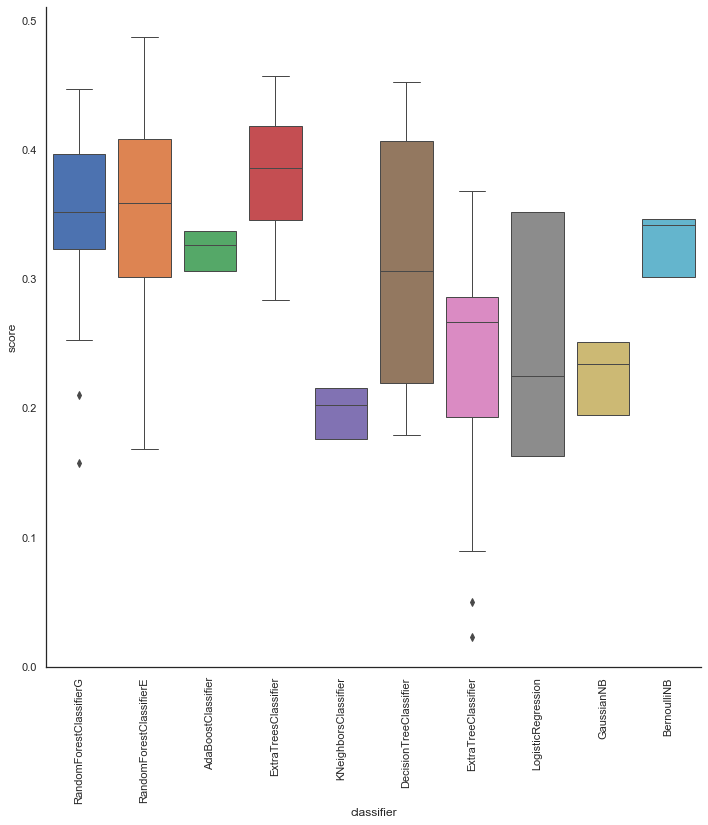

In [26]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [27]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('ExtraTreeClassifier', ExtraTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('GaussianNB', GaussianNB()),
               ('BernoulliNB', BernoulliNB())
              ]
allscores = []
for name, classifier in classifiers:
    scores = []
    for i in range(20): # 20 runs
        roc = cross_val_score(classifier, x, Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

RandomForestClassifierG 0.3518062058355632
RandomForestClassifierE 0.3832756639209958
AdaBoostClassifier 0.3229096486065542
ExtraTreesClassifier 0.3766475176578324
KNeighborsClassifier 0.19812385779061265
DecisionTreeClassifier 0.30636068758523133
ExtraTreeClassifier 0.24337298155071227
LogisticRegression 0.24671397131063885
GaussianNB 0.22674245258217746
BernoulliNB 0.330213577767135


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 1080x720 with 0 Axes>

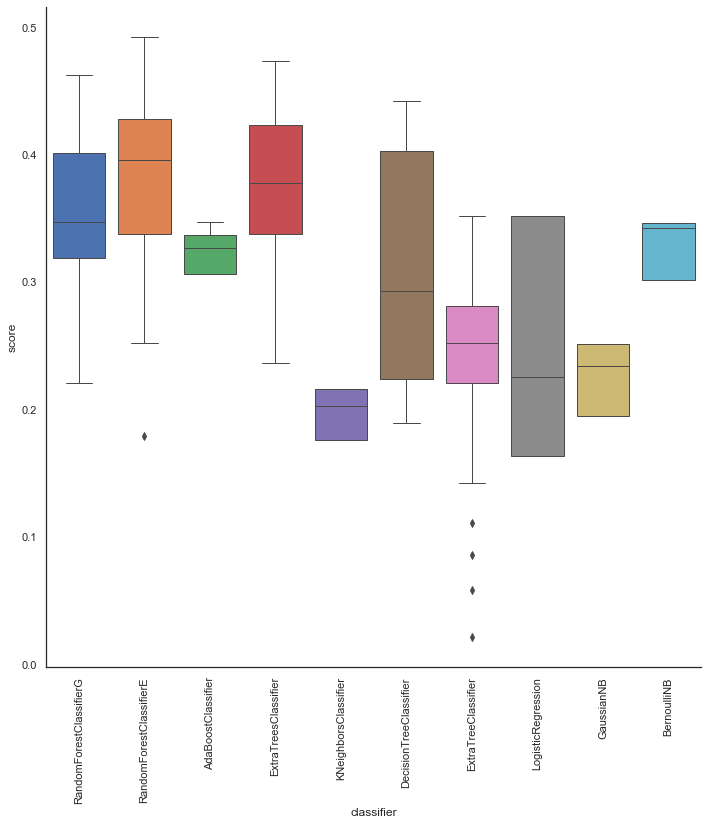

In [28]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [29]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = base_data.iloc[:,0:3]
Y = base_data.iloc[:,3]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.716816499206769


<l1>With wide range of data and statistical knowledge we can consider it to make a better prediction model thought at some point 
my model running at underfitting so after using ensambling techniques it got a better accuracy of 71.68% which i think will be a better 
predication for selecting the potential candidates. we can also better this model more and more development can be done to this.
i have used various plots showing the realtionship between the variables and skills of the particular candidates.</l1>